# Imports
numpy, pandas, sklearn, matplotlib을 사용할 것이다.

In [51]:
#numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing : 범주형 변수를 다루기 위함
from sklearn.preprocessing import LabelEncoder

# File system management
import os

# 에러 억제
import warnings
warnings.filterwarnings('ignore')

# 시각화 모듈 임포트 : 매트플립과 시본
import matplotlib.pyplot as plt
import seaborn as sns
input

<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x7fd1108246a0>>

# 데이터 불러와 읽기
우선, 우리는 데이터 파일들을 이용이 가능하게 가져올 수 있다. 총 9개의 파일인데, 1개의 훈련세트, 1개의 테스트 세트, 1개의  제출 파일, 6개의 추가정보 파일이 있다.

In [52]:
# 가능한 파일 목록
print(os.listdir('home-credit-default-risk'))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [53]:
# Training data
app_train = pd.read_csv('home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


훈련데이터는 307511개가 있고 타켓피처를 포함한 122개의 피처가 있다.

In [54]:
#Testing data features
app_test = pd.read_csv('home-credit-default-risk/application_test.csv')
print('Testing data shape : ', app_test.shape)
app_test.head()

Testing data shape :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


테스트 셋은 상당히 더 작고 타켓 컬럼을 포함하지 않는다.

# Exploratory Datat Analysis
EDA는 우리가 수리통계를 계산하거나 데이터안에서 경향,변칙,패턴 그리고 관계 등에 대한 피겨를 만드는 과정을 말한다. EDA의 목적은 우리의 데이터가 우리에게 뭘 말할 수 있을 까는 배우는 것이다. 이것은 일반적으로 높은 수준의 overview로 시작해서 우리가 특이점을 찾은 세부부분으로 간다. 우리가 찾은 것은 우리를 흥미롭게 할 수도 이쏙, 우리가 어떤 모델을 선택할지 알려주고, 우리가 어떤 피처를 사용할지를 결정하는 것에 도움을 준다. 

## Examine the Distribution of the Target Column
우리가 예측해야하는 타겟 : 대출에 대한 0은 제 시간에 상환되었거나, 고객이 지불에 어려움을 겪었음을 나타내는 1이다.
    우리는 먼저 각 범주에 속하는 대출의 수를 조사할 수 있다.

In [55]:
app_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

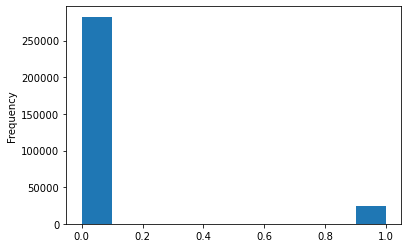

In [56]:
app_train["TARGET"].astype(int).plot.hist()

이 정보들로부터, 우리는 클래스 불균형을 볼 수 있다. 상환되지 않은 대출보다 저 때 상환된 대출이 훨씬 더 많다. 일단 우리가 더 정교한 기계 학습 모델에 들어가면, 우리는 이런한 불균형을 반영하기 위해 더이터의 표현으로 클래스에 가중치를 부여할 수 있다.

## 결측치 확인
다음으로 우리는 각 컬럼의 결측치의 수와 비율을 확인 할 것이다.

In [57]:
# Function to calcuate missing values by column# Funct
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = { 0 : "Missing Values", 1 : "% of Total Values"})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1 ]!=0].sort_values(
            "% of Total Values", ascending= False).round(1)
        
        
    # Print some summary information
    print('Your selected dataframe has ' + str(df.shape[1]) + "columns.\n"
         "There are" + str(mis_val_table_ren_columns.shape[0]) + 
         "columns that have missing values")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns


In [58]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122columns.
There are67columns that have missing values


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


기계학습 모델을 구축할 때가 되면, 우리는 이런한 누락된 값(계산으로 알려주는)을 채워야할 것이다. 이후 작업에서, 우리는 전가할 필요 없이 누락도니 값을 처리할 수 있는 SGBoost와 같은 모델을 사용할 것이다. 또 다른 옵션은 누락된 값을 비율이 높은 열을 삭제하는 것이지만, 이러한 열이 우리 모델에 도움이 돌지 미리 아는 것은 불가능하다. 그러므로, 우리는 당분간 모든 컬럼을 유지할 것입니다.

## Column Types

각 데이터 유형의 열 수를 살펴보겠습니다.
int64 와 float64는 숫자 변수(이산적이거나 연속적일 수도 있음)입니다. 
격체 열은 문자열을 포함하고 범주형 특징입니다.

In [59]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [60]:
list(app_train.columns).index('TARGET')

1

object 타입(범주형) 컬럼들의 유일값 수를 확인해보자.

In [61]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수들은 매우 적은 유일값 수를 가지고 있습니다. 우리는 이런 범두형 변수를 다루는 방법을 찾을 필요가 있습니다.

# Encoding Categorical Variables
우리가 더 나아가기 전에, 우리는 성가신 범주형 변수를 다룰 필요가 있다. 불행히도 기계 학습 모델은 범주형 변수를 처리할 수 없습니다.(LightGBM과 같은 일부 모델 제외) 
따라서, 우리는 이 변수들을 모델에 넘겨주기 ㄱ전에 숫자로 인코딩(표현)하는 방법을 찾아야한다. 이 과정을 수행하는 두가지 주요 방법이 있습니다.

- 1) 라벨 인코딩 : 정수로 범주형 변수의 각 고유한 범주를 할당합니다. 새로운 열은 생성되지 않습니다.
- 2) 원핫 인코딩 : 범주형 변수의 각 고유한 범주에 대한 새 열을 만드세요. 각 관찰은 해당 범주에 대해 열에서 1을 받고 다른 모든 새로운 열에서 0을 받는다.

라벨 인코딩의 문제는 카테고리에 임의의 순서를 제공한다는 것입니다. 각 범주에 할당된 값은 무작위이며 범주의 고유한 측면은 반영하지 않습니다. 위의 예에서 프로그래머는 4를 받고 데이터 과학자는 1을 받았지만, 우리가 같은 과정을 다시 한다면, 라벨은 뒤집히거나 완전히 다를 수 있습니다. 정수의 실제 할당은 임의적입니다. 따라서, 우리가 라벨 인코딩을 수행할 때, 모델은 우리가 원하는 것이 아닌 가중치를 할당하기 위해 기능의 상대적 값(예 : 프로그래머 = 4 및 데이터 과학자 = 1)을 사용할 수 있습니다. 범주형 변수(예 : 남성/여성)에 대해 두 개의 고유한 값만 있다면, 라벨 인코딩은 괜찮지만, 2개 이상의 고유한 범주의 경우, 하나의 핫 인코딩이 안전한 옵션입니다.

이러한 접근 방식의 상대적인 장점에 대한 논쟁이 있으며, 일부 모델은 문제 없이 라벨로 인코딩된 범주형 변수를 다룰 수 있습니다. 개인적인 의견이지만 많은 클래스를 가진 범주형 변수에 대해, 원핫 인코딩은 범주에 임의의 값을 부과하지 않기 때문에 가장 안전한 접근 방식이라고 생각한다. 원핫 인코딩의 유일한 단점은 기능의 수(데이터의 차원)가 많은 범주의 범주형 변수로 폭발할 수 있다는 것이다. 이를 처리하기 위해, 우리는 (여전히 정보를 보존하려고 노력하면서) 차원의 수를 줄이기 위해 PCA 또는 다른 차원 감소 방법에 이어 하나의 핫 인코딩을 수행할 수 있습니다.

이 노트북에서, 우리는 2개 이상의 범주형 변수에 대해 라벨 인코딩을 사용하고 2개의 범주형 변수에 대해 원핫 인코딩을 사용할 것이빈다. 이 과정은 우리가 프로젝트에 더 깊이 들어가면서 바뀌어야 할 수도 있지만, 현재로서는 이것이 우리를 어디로 데려가는지 보게 될 것이다.
(우리는 또한 이 노트북에서 차원 감소를 사용할지 않을 것이지만 향후 반복에서 사용할 것입니다.)

## Label Encoding and One-Hot Encoding
위에서 설명했던 것들을 구현해 봅시다. : 2개의 고유한 범주를 가진 범주형 변수(dtypes == object)의 경우, 우리는 라벨 인코딩을 사용할 것이며, 2개이상의 고유한 범주를 가진 범주형 변수의 경우, 우리는 원핫 인코딩을 사용할 것입니다. 

라벨 인코딩을 위해, 우리는 Scikit-Learn LabelEncoder를 사용하고 원핫 인코딩을 위해 pandas get_dummies(df) 함수를 사용할 것입니다.

In [62]:
#Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train :
    if app_train[col].dtype == "object":
        # if 2 of fewer unique categories
        if len(list(app_train[col].unique())) <=2 :
            le.fit(app_train[col])
            #Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            # keep track of how many columns were label encoded
            le_count += 1
        
print("%d columns were label encoded."%le_count)

3 columns were label encoded.


In [63]:
list(app_train.columns).index('TARGET')

1

In [64]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Feature shape: ', app_train.shape)
print('Testing Feature shape: ', app_test.shape)

Training Feature shape:  (307511, 243)
Testing Feature shape:  (48744, 239)


In [65]:
list(app_train.columns).index('TARGET')

1

## Aligning Training and Testing Data
훈련과 테스트 데이터 모두에 동일한 기능(열)이 있어야 합니다. 원 핫 인코딩은 테스트 데이터에 표시되지 않는 범주형 변수가 있었기 때문에 훈련 데이터에 더 많은 열을 만들었습니다. 테스트 데이터에 없는 훈련 데이터의 열을 제거하려면 데이터 프레임을 정렬해야합니다. 먼저 우리는 훈련 데이터에서 대상 열을 추출합니다.(이것은 테스트 데이터에 없지만 이 정보를 유지해야 하기 떄문입니다.) 정렬을 할 때, 행이 아닌 열을 기반으로 데이터 프레임을 정렬을 할 때, 행이 아닌 열을 기반을 데이터 프레임을 정렬하기 위해 축 =1을 설정해야합니다.

In [66]:
train_labels = app_train["TARGET"]

#Align the training and testing data, keep data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = "inner", axis = 1)

# Add teh target back in
app_train['TARGET'] = train_labels

print('Training Features shape : ', app_train.shape)
print('Testing Features shape : ', app_test.shape)


Training Features shape :  (307511, 240)
Testing Features shape :  (48744, 239)


훈련 및 테스트 데이터 세트는 이제 기계학습에 필요한 것과 동일한 기능을 가지고 있다. 원 핫 인코딩으로 인해 기능의 수가 크게 증가했다. 어느 시점에서 우리는 아마도 데이터 세트의 크기를 줄이기 위해 차원감소(관련되지 않은 기능 제거)를 시도하고 싶을 것입니다.

# Back to Exploratory Data Analysis

## Anomailes(변칙)
EDA를 할 때 우리가 항상 경계하고 싶은 한가지 문제는 데이터 내의 이상치이다.
이것들은 잘못 입력된 숫자, 측정 장비의 오류 때문일 수도 있고, 유효하지만, 극단적인 측정일 수도 있다. 이상을 정략적으로 지원하는 한 가지 방법은 설명 방법을 상요하여 열의 통계를 보는 것이다.
DAYS_BIRTH 열의 숫자는 현재 대출 신청서와 관련하여 기록되기 떄문에 음수 입니다. 몇 년동안 이러한 통계를 보기 우해, 우리는 -1로 숫자를 곱하고 한 해의 일 수로 나눌 수 있습니다.

In [70]:
(app_train["DAYS_BIRTH"] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

그 나이들은 합리적으로 보인다. 하이 엔드나 로우 엔트의 나이에 대한 이상값은 없다. 고용일은 어떠한가?

In [71]:
app_train["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

이것은 옳지 않아보인다. 최대 가치는(긍적인 것 외에) 약 1000년이다.

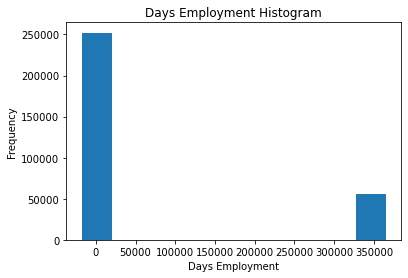

In [73]:
app_train["DAYS_EMPLOYED"].plot.hist(title = "Days Employment Histogram");
plt.xlabel("Days Employment");

가볍게, 변칙적인 고객을 하위 집합하고 그들이 나머지 고객들보다 더 높거나 낮은 채무 불이행률을 보이는 경향이 있는지 봅시다.

In [76]:
anom = app_train[app_train["DAYS_EMPLOYED"] == 365243]
non_anom = app_train[app_train["DAYS_EMPLOYED"] != 365243]
print('The non-anomalies default on %0.2f%% of loans'%(100* non_anom["TARGET"].mean()))
print('The anomalies default on %0.2f%% of loans'%(100* anom["TARGET"].mean()))
print('There are %d anomalous days of employment'%len(anom))

The non-anomalies default on 8.07% of loans
The anomalies default on nan% of loans
There are 0 anomalous days of employment


역시 흥미롭습니다. 변칙적인 고객이 채무 불이행률이 더 낮다는 것이 밝혀졌습니다.

변칙을 처리하는 것은 정해진 규칙 없이 정확한 상황에 달려 있습니다. 가장 안전한 방법 중 하나는 변칙을 누락된 값으로 설정한 다음 기계 학습 전에 (전산을 사용하여) 작성하는 것입니다. 이 경우, 모든 변칙이 정확히 같은 값을 가지고 있기 때문에, 우리는 이러한 모든 대출이 공통점을 공유할 경우를 대비하여 동이한 값으로 채우고 싶습니다. 변칙적인 값은 어느 정도 중요한 것 같기 때문에 우리가 실제로 이러한 값을 채웠다면 기계 학습 모델을 말하고 싶습니다. 해결책으로, 우리는 숫자(np.nan)가 아닌 변칙적인 값을 채운 다음 값이 변칙적인지 여부를 나타내는 새로운 불리언 열을 만들것입니다.

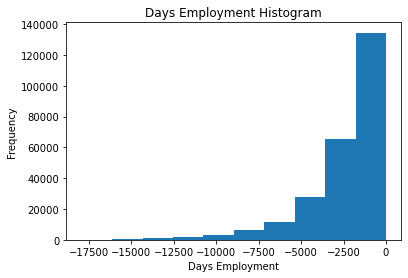

In [77]:
# Create an anomalous flag column
app_train["DAYS_EMPLOYED_ANOM"] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train["DAYS_EMPLOYED"].replace({365243:np.nan}, inplace = True)

app_train["DAYS_EMPLOYED"].plot.hist(title = "Days Employment Histogram");
plt.xlabel("Days Employment");

분포는 우리가 기대하는 것과 훨씬 더 일치하는 것으로 보이며, 우리는 또한 이러한 값이 원래 변칙적이라는 것을 원래 변칙적이라는 것을 모델에 알리기 위해 새로운 열을 만들었습니다.(우리는 nans로 일부값을 채우고, 아마도 열의 중앙값으로 채워야 하기 때문이다.) 데이터 프레임에 DAYS가 있는 다른 열들은 명백한 이상치 없이 우리가 기대하는 것에 관한 것으로 보인다. 

매우 중요한 것은, 우리가 훈련 데이터에 대해 하는 모든 것은 테스트 데이터에 대해서도 해야한다. 새 열을 만들고 테스트 데이터에서 np.nan.으로 기존 열을 채우도록 합니다.

In [78]:
app_test["DAYS_EMPLOYED_ANOM"] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243 : np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries'%(app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))
      

There are 9274 anomalies in the test data out of 48744 entries


## Correlations
이제 범주형 변수와 이상값을 다뤘으니, EDA를 계속해 봅시다. 데이터를 시도하고 이해하는 한가지 방법은 기능과 대상 사이의 상관관계를 찾는 것입니다. .corr 데이터 프레임 방법을 사용하여 모든 변수와 대상 사이의 피어슨 상관 계수를 계산할 수 있습니다.

상관계수는 특징의 "관련성"을 나타내는 가장 큰 방법은 아니지만, 데이터 내에서 가능한 관계에 대한 아이디어를 제공합니다.
상관관계의 절대값에 대한 몇 가지 일반적인 해석은 다음과 같다 :
- .00 - 0.19 "매우 약함"
- 0.20 - 0.39 "약함"
- 0.40 - 0.59 "보통"
- 0.60 - 0.79 "강함"
- 0.80 - 1.0 "매우 강함"

In [80]:
# Find correlations with the target and sort
correlations = app_train.corr()["TARGET"].sort_values()

# Display correlations
print('Most Positivie Correlations : \n', correlations.tail(15))
print("\nMost Negative Correlations : \n", correlations.head(15))

Most Positivie Correlations : 
 FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
DAYS_EMPLOYED_ANOM                                        NaN
Name: TARGET, dtype: float64

Most Neg

좀 더 중요한 상관관계를 살펴봅시다 :
DAYS_BIRTH는 가장 긍정적인 상관관계입니다.(변수와 그 자체의 상관관게는 항상 1이기 떄문에 TARGET을 제외하고) 문서를 보면, DAYS_BIRTH는 대출 당시 부정적인 날의 고객의 나이입니다.(어떤 이유에서든!) 상관관계는 긍정적이지만, 이 기능의 가치는 실제로 부정적이며, 이는 고객의 나이가 들어감에 따라 대출을 불이행할 가능성이 적다는 것을 의미합니다.(즉, 목표 == 0) 그것은 조금 혼란스럽기 때문에, 우리는 그 기능의 절대값을 취할 것이고 상관관계는 음수가 될 것입니다.

## Effect of Age on Repayment

In [82]:
# Find the correlation of the positive days since birth and target
app_train["DAYS_BIRTH"] = abs(app_train["DAYS_BIRTH"])
app_train["DAYS_BIRTH"].corr(app_train["TARGET"])

-0.07823930830982737

고객이 나이가 드렁감에 따라, 목표가 부정적인 선형 관계가 있는데, 이는 고객이 나이가 들어감에 따라 대출을 더 자주 상환하는 경향이 있다는 것을 의미한다.

이 변수를 살펴보기 시작합니다. 먼저, 우리는 나이의 히스토그램을 만들 수 있다. 우리는 그래프를 더 이해할 수 있도록 x축을 넣을 것이다.

Text(0, 0.5, 'Count')

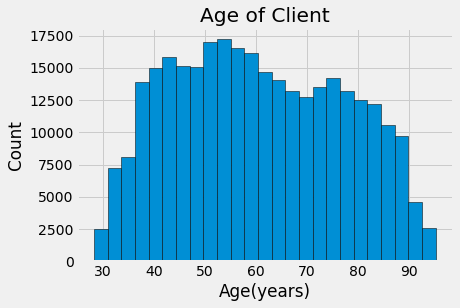

In [83]:
#Set teh style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train["DAYS_BIRTH"]/ 265, edgecolor = 'k', bins = 25)
plt.title("Age of Client"); 
plt.xlabel("Age(years)")
plt.ylabel("Count")

그 자체로, 나이의분포는 모든 연령대가 합리적이기 때문에 이상값이 없다느 ㄴ것 외에는 우리가 많은 것을 말해주지 않는다. 목표가 목표에 미치는 영향을 시각화하기 위해, 우리는 다음으로 목표의 값을 색칠된 커널 밀도 추정 플롯(KDE)을 만들 것이다. 커널 밀도 추정 플롯은 단일 변수의 분포를 부여주며 평활화된 히스토그램으로 생각할 수 있다(각 데이터 지점에서 커널, 보통 가우스를 계산한 다음 모든 개별 커널을 평균하여 단일 매끄러운 곡선을 개발함으로써 생성된다.) 우리는 이 그래프에 seaborn kdeplot을 사용할 것이다.

Text(0.5, 1.0, 'Distrubution of Ages')

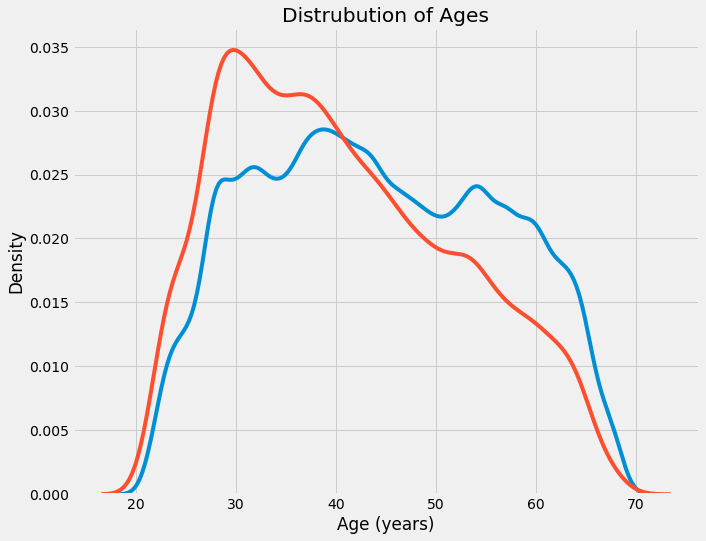

In [84]:
plt.figure(figsize = (10,8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train["TARGET"] == 0 , "DAYS_BIRTH"]/365, label = "target == 0")

#KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train["TARGET"] == 1 , "DAYS_BIRTH"]/365, label = "target == 1")

#Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel("Density"); plt.title("Distrubution of Ages")

목표 == 1 곡선은 범위의 끝이 더 젊은 쪽을 향해 있다. 이것은 중요한 상관관계(-0.07 상관계수)는 아니지만, 이 변수는 대상에 영향을 미치기 떄무넹 기계 학습 모델에 유용할 것이다. 이 관계를 다른 방식으로 살펴봅시다 : 연령대별 대출 상환의 평균 실패

이 그래프를 만들기 위해, 먼저 윌는 연령 범주를 각각 5년의 bins로 줄였다. 그런 다음, 각 bins에 대해 우리는 목표의 평균 가치를 계산하며, 이는 각 연령 범주에서 상환되지 않은 대출의 비율을 알려줍니다.


In [ ]:
# Age imformation into a separate dataframe
age_data = app_train